In [219]:
# Qiskit 1.x / qiskit-algorithms 0.3+ compatible
from math import asin, sqrt
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit_algorithms import EstimationProblem
from qiskit_algorithms import (
    AmplitudeEstimation,
    IterativeAmplitudeEstimation,
    MaximumLikelihoodAmplitudeEstimation,
)
from qiskit.primitives import Sampler, StatevectorSampler

import matplotlib.pyplot as plt

import numpy as np
import pandas as pd

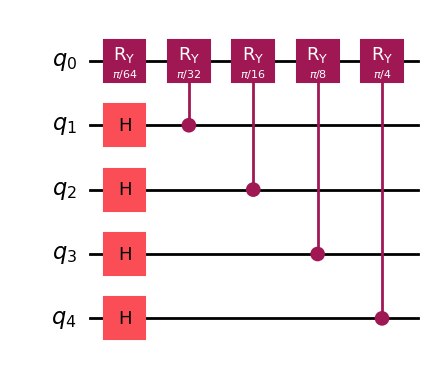

In [220]:
# build circuit
qr_A = QuantumRegister(5, name='q')
#cr_A = ClassicalRegister(1, name='c')
qc_A = QuantumCircuit(qr_A)

qc_A.h(range(1, 5))

# set angles
angles = [np.pi/64, np.pi/32, np.pi/16, np.pi/8, np.pi/4]
qc_A.ry(angles[0], 0)
for i, angle in enumerate(angles[1:], start=1):
    qc_A.cry(angle, i, 0)
# measure
#qc_A.measure(0, 0)

# show
qc_A.draw('mpl')


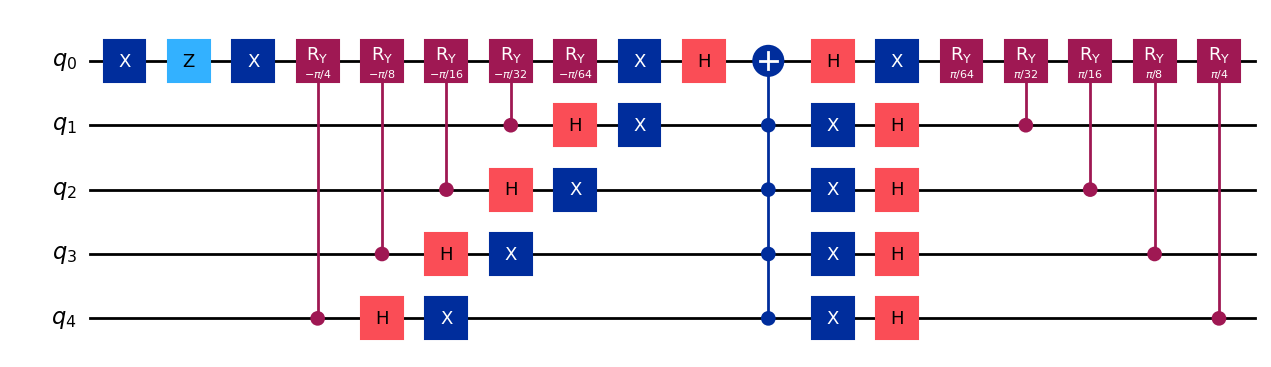

In [221]:
# build circuit
qr_Q = QuantumRegister(5, name='q')
qc_Q = QuantumCircuit(qr_Q)

# S_phi_0
qc_Q.x(0)
qc_Q.z(0)
qc_Q.x(0)
# barrier
#qc_Q.barrier()

# A^dagger
qc_Q.cry(-np.pi/4, 4,0)
qc_Q.cry(-np.pi/8, 3,0)
qc_Q.cry(-np.pi/16, 2,0)
qc_Q.cry(-np.pi/32, 1,0)
qc_Q.ry(-np.pi/64, 0)
qc_Q.h(range(1, 5))
# barrier
#qc_Q.barrier()

# S_0
qc_Q.x(range(5))
qc_Q.h(0)
qc_Q.mcx([1, 2, 3, 4], 0)
qc_Q.h(0)
qc_Q.x(range(5))

# barrier
#qc_Q.barrier()

# A
qc_Q.h(range(1, 5))
qc_Q.ry(np.pi/64, 0)
qc_Q.cry(np.pi/32, 1,0)
qc_Q.cry(np.pi/16, 2,0)
qc_Q.cry(np.pi/8, 3,0)
qc_Q.cry(np.pi/4, 4,0)

# show
qc_Q.draw('mpl')

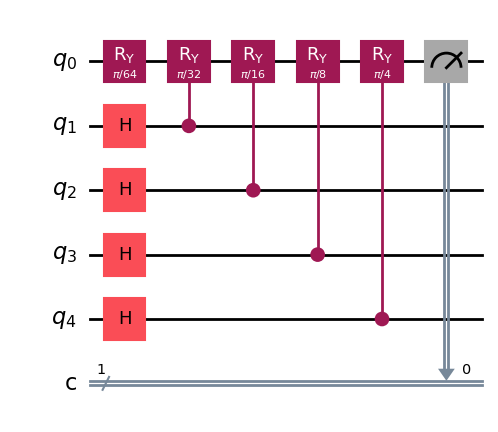

In [222]:
# build circuit
qr = QuantumRegister(5, name='q')
cr = ClassicalRegister(1, name='c')
qc_C = QuantumCircuit(qr, cr)

qc_C.h(range(1, 5))

# set angles
angles = [np.pi/64, np.pi/32, np.pi/16, np.pi/8, np.pi/4]
qc_C.ry(angles[0], 0)
for i, angle in enumerate(angles[1:], start=1):
    qc_C.cry(angle, i, 0)
# measure
qc_C.measure(0, 0)

# show
qc_C.draw('mpl')

In [223]:
# 목표 정확도 리스트 (예시)
i = np.arange(16)
real_value = np.sum(np.sin(np.pi/64 * i + np.pi/128)**2 * (1/16))

shots = 100
# 샷 기반 시뮬레이터
sampler = Sampler(options= {'shots':shots})
# IAE 문제 정의
problem = EstimationProblem(
    state_preparation=qc_A,
    grover_operator=qc_Q,
    objective_qubits=[0]
)


accuracy = [0.001, 0.005, 0.01, 0.015, 0.02]

# store 딕셔너리 생성
store = {}
estimate = {}
iterations = {}

# 각 정확도에 대해 반복 수행
for idx, acc in enumerate(accuracy, start=1):
    values = []  # num_oracle_queries 반복 결과 저장
    iteration_counts = []  # 총 A 회로 사용 횟수 저장
    estimation = []
    
    for _ in range(100):  # 10번 반복
        iae = IterativeAmplitudeEstimation(
            epsilon_target=acc,
            alpha=0.05,
            sampler=sampler
        )
        iae_result = iae.estimate(problem)
        estimation.append(iae_result.estimation)
        
        # num_oracle_queries 수집
        values.append(iae_result.num_oracle_queries)
        iteration_counts.append(2 * iae_result.num_oracle_queries)  # 총 A 회로 사용 횟수
        #iteration_counts = 2 * iae_result.num_oracle_queries
        #iterations.append(iteration_counts)
    # store에 리스트 형태로 저장
    store[f'store{idx}'] = values
    estimate[f'estimate{idx}'] = estimation
    iterations[f'iterations{idx}'] = iteration_counts

# 확인
sums = []
for idx in range(1, 6):
    print(f"store{idx}:", store[f'store{idx}'])
    sums.append(sum(iterations[f'iterations{idx}']))
    print(f"iterations{idx}:", iterations[f'iterations{idx}'])
    print(f"estimate{idx}:", estimate[f'estimate{idx}'])



C:\Users\user\AppData\Local\Temp\ipykernel_7740\3932235176.py:7: DeprecationWarning: The class ``qiskit.primitives.sampler.Sampler`` is deprecated as of qiskit 1.2. It will be removed no earlier than 3 months after the release date. All implementations of the `BaseSamplerV1` interface have been deprecated in favor of their V2 counterparts. The V2 alternative for the `Sampler` class is `StatevectorSampler`.
  sampler = Sampler(options= {'shots':shots})


store1: [29200, 18800, 21400, 12700, 18600, 30400, 20300, 17700, 22000, 29500, 24800, 27900, 11600, 24700, 25200, 28500, 18100, 10400, 23200, 28100, 28300, 35300, 12900, 23700, 21300, 18000, 31300, 25200, 18900, 31600, 27000, 27000, 11500, 35700, 12200, 24300, 37900, 12500, 28800, 18400, 35700, 32900, 31900, 17500, 11200, 29000, 18100, 24100, 25900, 35600, 31200, 34600, 17000, 35800, 29500, 33800, 32400, 34400, 24300, 33000, 26400, 39900, 33800, 34400, 35700, 35400, 34600, 33300, 36100, 33500, 18200, 34400, 9300, 26400, 35500, 18100, 32300, 18900, 13400, 35300, 17700, 29200, 9700, 37000, 19100, 11100, 24100, 12700, 27900, 18000, 35300, 31500, 35800, 39500, 34400, 28300, 18000, 8500, 23200, 11100]
iterations1: [58400, 37600, 42800, 25400, 37200, 60800, 40600, 35400, 44000, 59000, 49600, 55800, 23200, 49400, 50400, 57000, 36200, 20800, 46400, 56200, 56600, 70600, 25800, 47400, 42600, 36000, 62600, 50400, 37800, 63200, 54000, 54000, 23000, 71400, 24400, 48600, 75800, 25000, 57600, 36800, 

In [224]:
rmse = {}

# estimate1~estimate5 반복
for idx in range(1, 6):
    estimates_list = estimate[f'estimate{idx}']  # 10개 값 리스트
    # 각 값과 real_value 차이 제곱
    errors = [(real_value - est)**2 for est in estimates_list]
    # 평균 -> 루트 -> RMSE
    rmse[f'rmse{idx}'] = np.sqrt(np.mean(errors))

rmses = []
# 결과 확인
for idx in range(1, 6):
    print(f"RMSE{idx}:", rmse[f'rmse{idx}'])
    rmses.append(rmse[f'rmse{idx}'])
print(sums)
print(rmses)


RMSE1: 9.618696652891859e-05
RMSE2: 0.0006391361120059013
RMSE3: 0.0019217636375902587
RMSE4: 0.0021070017055964483
RMSE5: 0.0021872693971592126
[5099600, 1045000, 286200, 258000, 215200]
[9.618696652891859e-05, 0.0006391361120059013, 0.0019217636375902587, 0.0021070017055964483, 0.0021872693971592126]


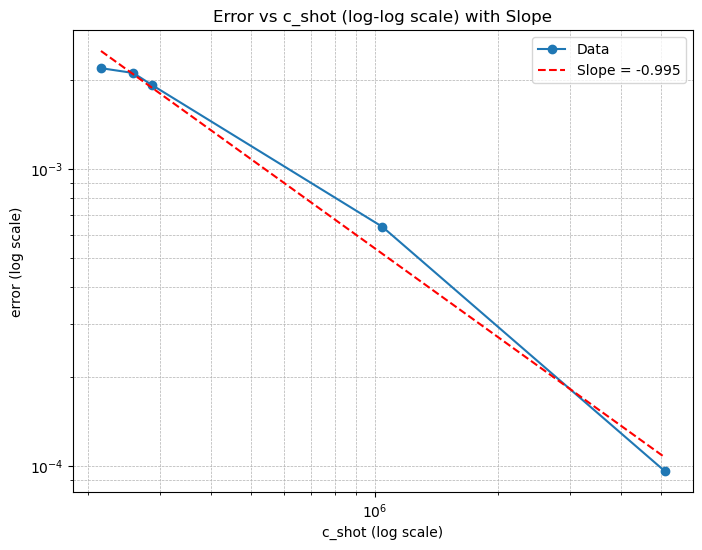

In [225]:
# 오름차순 인덱스 계산
sorted_idx = np.argsort(sums)

# sums와 resmes 재정렬
sums_sorted = np.array(sums)[sorted_idx]
resmes_sorted = np.array(rmses)[sorted_idx]

# 로그 기울기 계산
log_x = np.log(sums_sorted)
log_y = np.log(resmes_sorted)
slope, intercept = np.polyfit(log_x, log_y, 1)

# plot
plt.figure(figsize=(8, 6))
plt.plot(sums_sorted, resmes_sorted, marker='o', linestyle='-', label="Data")
plt.xscale("log")
plt.yscale("log")

# add slope line
fit_y = np.exp(intercept) * sums_sorted**slope
plt.plot(sums_sorted, fit_y, linestyle="--", color="red", label=f"Slope = {slope:.3f}")

plt.xlabel("c_shot (log scale)")
plt.ylabel("error (log scale)")
plt.title("Error vs c_shot (log-log scale) with Slope")
plt.legend()
plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.show()


In [226]:
c_shot_list = [2000, 5000,  10000, 25000, 40000]

In [227]:
results_list = []

M = 100

for c_shot in c_shot_list:
    I_list = []
    
    for _ in range(M):
        # run on statevectorsampler
        state_sampler = StatevectorSampler()
        result=state_sampler.run([qc_C], shots = c_shot).result()
        # access result for pub 0
        data_pub = result[0].data

        # get counts for classical
        counts = data_pub.c.get_counts()
        total_shots = sum(counts.values())
        frequencies = {k: v / total_shots for k, v in counts.items()}

        # freq for "1"
        I_list.append(frequencies.get('1', 0))
        
    # caculate rmse
    error = np.sqrt(np.mean([(real_value - I_i)**2 for I_i in I_list]))
    
    # to list
    results_list.append({
        "c_shot": c_shot,
        "error": error
    })

# 결과 DataFrame
error_df = pd.DataFrame(results_list)
print(error_df)
# to df
error_df = pd.DataFrame(results_list)
error_df

   c_shot     error
0    2000  0.007136
1    5000  0.005401
2   10000  0.003550
3   25000  0.002469
4   40000  0.001908


,c_shot,error
0,2000,0.007136
1,5000,0.005401
2,10000,0.003550
3,25000,0.002469
4,40000,0.001908


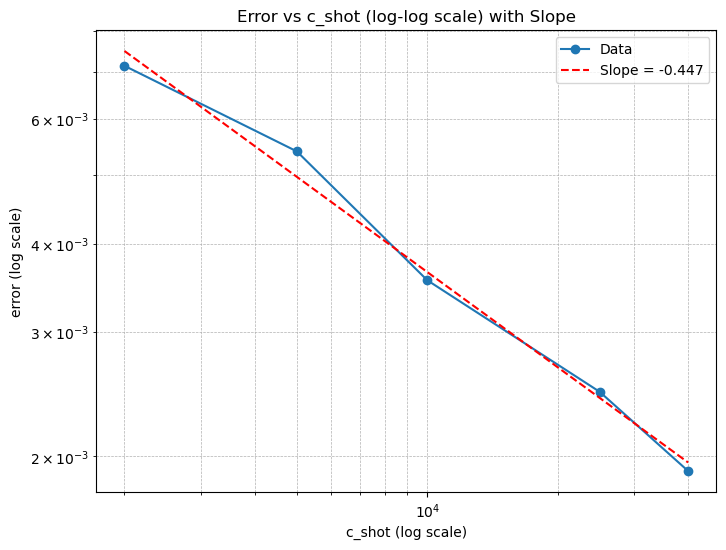

In [228]:
# caculate log slope
log_x = np.log(error_df["c_shot"])
log_y = np.log(error_df["error"])
slope, intercept = np.polyfit(log_x, log_y, 1)

# plot
plt.figure(figsize=(8, 6))
plt.plot(error_df["c_shot"], error_df["error"], marker='o', linestyle='-', label="Data")
plt.xscale("log")
plt.yscale("log")

# add slope
fit_y = np.exp(intercept) * error_df["c_shot"]**slope
plt.plot(error_df["c_shot"], fit_y, linestyle="--", color="red", label=f"Slope = {slope:.3f}")

plt.xlabel("c_shot (log scale)")
plt.ylabel("error (log scale)")
plt.title("Error vs c_shot (log-log scale) with Slope")
plt.legend()
plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.show() 

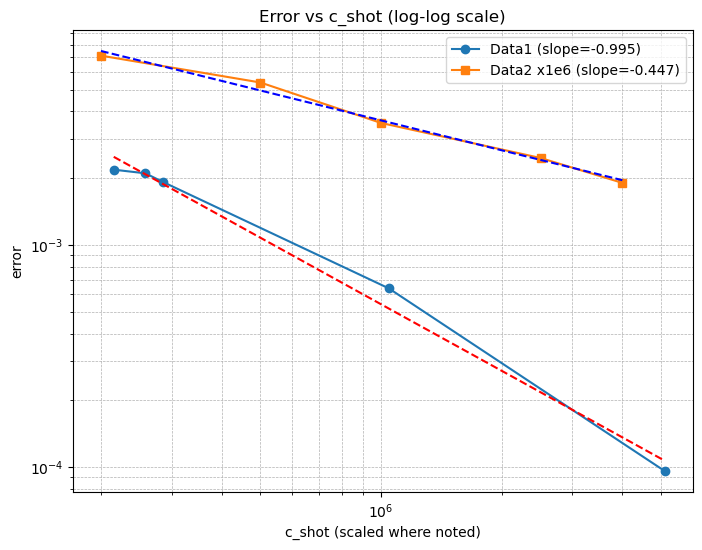

In [229]:
import numpy as np
import matplotlib.pyplot as plt

# ----- 첫 번째 데이터 처리 -----
sorted_idx = np.argsort(sums)
sums_sorted = np.array(sums)[sorted_idx]
resmes_sorted = np.array(rmses)[sorted_idx]

log_x1 = np.log(sums_sorted)
log_y1 = np.log(resmes_sorted)
slope1, intercept1 = np.polyfit(log_x1, log_y1, 1)
fit_y1 = np.exp(intercept1) * sums_sorted**slope1

# ----- 두 번째 데이터 처리 (x축 100 배) -----
c_shot_scaled = error_df["c_shot"] * 100
log_x2 = np.log(c_shot_scaled)
log_y2 = np.log(error_df["error"])
slope2, intercept2 = np.polyfit(log_x2, log_y2, 1)
fit_y2 = np.exp(intercept2) * c_shot_scaled**slope2

# ----- 그래프 -----
plt.figure(figsize=(8, 6))

# 첫 번째 데이터
plt.plot(sums_sorted, resmes_sorted, marker='o', linestyle='-', label=f"Data1 (slope={slope1:.3f})")
plt.plot(sums_sorted, fit_y1, linestyle="--", color="red")

# 두 번째 데이터 (x축 스케일 적용)
plt.plot(c_shot_scaled, error_df["error"], marker='s', linestyle='-', label=f"Data2 x1e6 (slope={slope2:.3f})")
plt.plot(c_shot_scaled, fit_y2, linestyle="--", color="blue")

# 공통 설정
plt.xscale("log")
plt.yscale("log")
plt.xlabel("c_shot (scaled where noted)")
plt.ylabel("error")
plt.title("Error vs c_shot (log-log scale)")
plt.legend()
plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.show()
